Libraries

In [3]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Data Ingestion

In [4]:
# Data
path = r"../data/raw/germanCredit.csv"
df_gc = pd.read_csv(path)
df_gc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         1000 non-null   int64 
 1   checkin_acc        1000 non-null   object
 2   duration           1000 non-null   int64 
 3   credit_history     1000 non-null   object
 4   amount             1000 non-null   int64 
 5   savings_acc        1000 non-null   object
 6   present_emp_since  1000 non-null   object
 7   inst_rate          1000 non-null   int64 
 8   personal_status    1000 non-null   object
 9   residing_since     1000 non-null   int64 
 10  age                1000 non-null   int64 
 11  inst_plans         1000 non-null   object
 12  num_credits        1000 non-null   int64 
 13  job                1000 non-null   object
 14  status             1000 non-null   int64 
dtypes: int64(8), object(7)
memory usage: 117.3+ KB


In [5]:
df = df_gc.copy()
df.head()

,Unnamed: 0,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1


Feature Count

In [6]:
df_categories = {'FEATURE' : [],
                 'COUNT' : [],
                 'UNIQUE_VALUES' : [],
                 }

for feature in df.columns:
    df_categories['FEATURE'].append(feature)
    df_categories['UNIQUE_VALUES'].append(df[feature].unique())
    df_categories['COUNT'].append(len(df[feature].unique()))

pd.DataFrame(df_categories)

,FEATURE,COUNT,UNIQUE_VALUES
0,Unnamed: 0,1000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,checkin_acc,4,"[A11, A12, A14, A13]"
2,duration,33,"[6, 48, 12, 42, 24, 36, 30, 15, 9, 10, 7, 60, ..."
3,credit_history,5,"[A34, A32, A33, A30, A31]"
4,amount,921,"[1169, 5951, 2096, 7882, 4870, 9055, 2835, 694..."
5,savings_acc,5,"[A65, A61, A63, A64, A62]"
6,present_emp_since,5,"[A75, A73, A74, A71, A72]"
7,inst_rate,4,"[4, 2, 3, 1]"
8,personal_status,4,"[A93, A92, A91, A94]"
9,residing_since,4,"[4, 2, 3, 1]"


In [7]:
df.columns

Index(['Unnamed: 0', 'checkin_acc', 'duration', 'credit_history', 'amount',
       'savings_acc', 'present_emp_since', 'inst_rate', 'personal_status',
       'residing_since', 'age', 'inst_plans', 'num_credits', 'job', 'status'],
      dtype='object')

Distribution of Target

<Axes: xlabel='status', ylabel='count'>

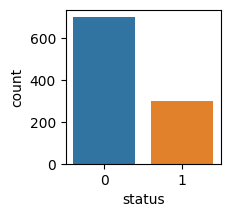

In [8]:
target = 'status'
plt.figure(figsize=(2,2))
sns.countplot(x=df[target],)

Distribution of Categorical Variables

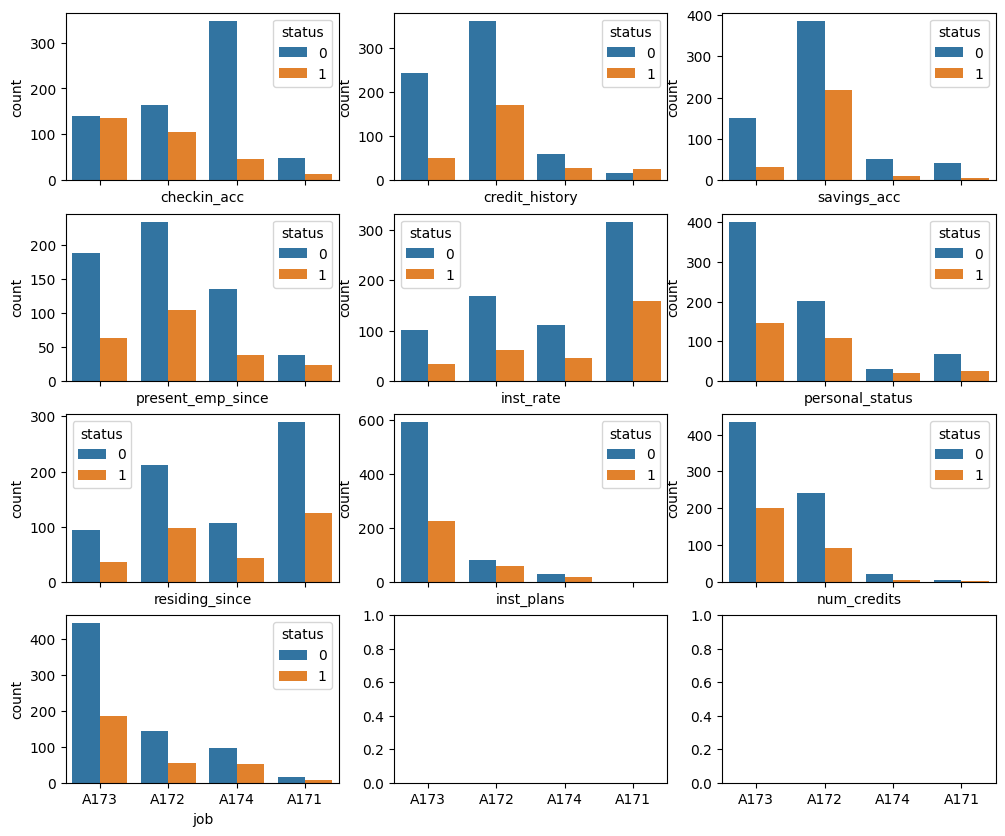

In [22]:
features_categorical = ['checkin_acc', 'credit_history',
       'savings_acc', 'present_emp_since', 'inst_rate', 'personal_status',
       'residing_since', 'inst_plans', 'num_credits', 'job',]

f, axes = plt.subplots(4, 3, figsize=(12, 10), sharex=True)
for feature, axis in zip(features_categorical, axes.flatten()):
      sns.countplot(x=df[feature], ax= axis, hue=df['status'])

Distribution of Numerical Features

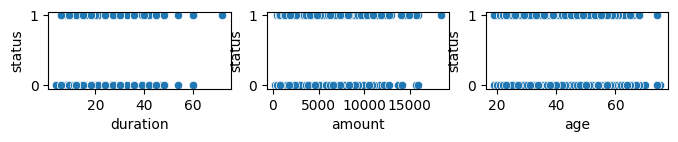

In [23]:
features_neumerical = ['duration', 'amount', 'age',]

f, axes = plt.subplots(1, 3, figsize=(8, 1), sharex=False)
for axis, feature in zip(axes.flatten(), features_neumerical):
      sns.scatterplot(data=df,
                  x=feature,
                  y='status',
                  ax=axis,
                  )